---

This Jupyter notebook contains the code to create the data visualizations for the article "Model evaluation, model selection, and algorithm selection in machine learning - Part II" at http://sebastianraschka.com/blog/2016/model-evaluation-selection-part2.html.

---

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Resampleo y distribuciones

In [62]:
rng = np.random.RandomState(12345)

gauss = rng.multivariate_normal(mean=np.array([0., 0.]), 
                                cov=np.array([[2., 1.], 
                                              [1., 2.]]), 
                                size=500000)

with plt.style.context(('fivethirtyeight')):
    fig = plt.figure(figsize=(3, 3))
    ax = fig.add_subplot(111)
    sns.kdeplot(x=gauss[:, 0], y=gauss[:, 1])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.savefig('figures/gauss_pop.svg')
    

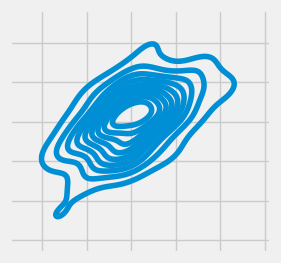

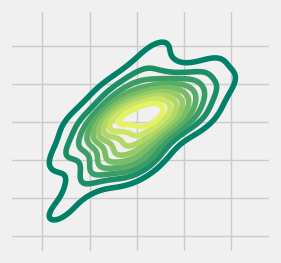

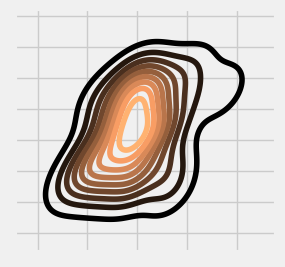

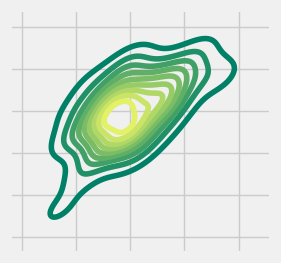

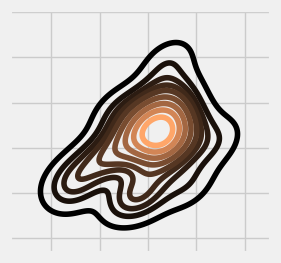

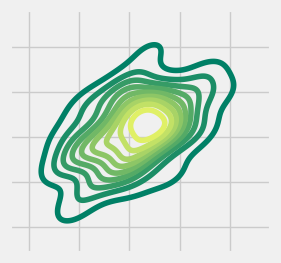

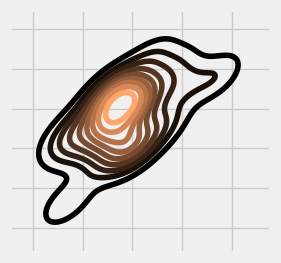

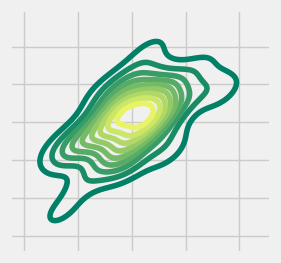

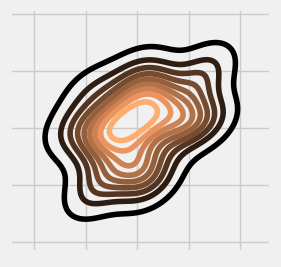

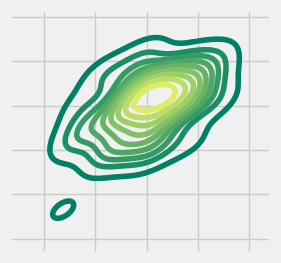

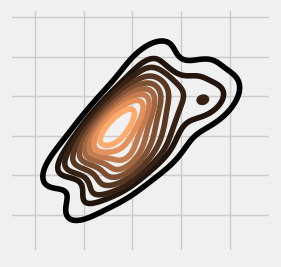

In [58]:
import seaborn as sns
from sklearn.model_selection import train_test_split

rng = np.random.RandomState(12345)

gauss = rng.multivariate_normal(mean=np.array([0., 0.]), 
                                cov=np.array([[2., 1.], 
                                              [1., 2.]]), 
                                size=100)

with plt.style.context(('fivethirtyeight')):
    fig = plt.figure(figsize=(3, 3))
    ax = fig.add_subplot(111)
    sns.kdeplot(x=gauss[:, 0], y=gauss[:, 1]) 
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.savefig('figures/gauss_small_orig.svg')
    #plt.show()
    

seeds = np.arange(10**5)
rng.shuffle(seeds)
seeds = seeds[:50]

pred_2 = []

with plt.style.context(('fivethirtyeight')):
    for i in range(5):
        X_train, X_test = train_test_split(gauss,
                                           test_size=0.3, 
                                           random_state=i)
    
        fig = plt.figure(figsize=(3, 3))
        ax = fig.add_subplot(111)
        sns.kdeplot(x=X_train[:, 0], y=X_train[:, 1], cmap='summer')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        plt.savefig('figures/gauss_%d_small_train.svg' % i)
        #plt.show()
        fig = plt.figure(figsize=(3, 3))
        ax = fig.add_subplot(111)
        sns.kdeplot(x=X_test[:, 0], y=X_test[:, 1], cmap='copper')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        plt.savefig('figures/gauss_%d_small_test.svg' % i)
        #plt.show()

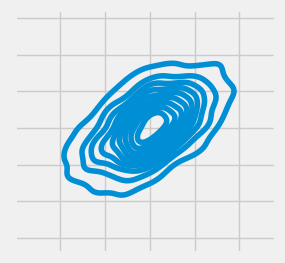

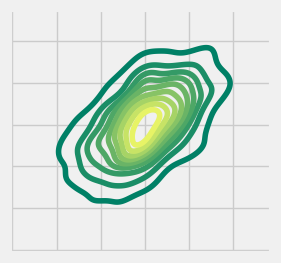

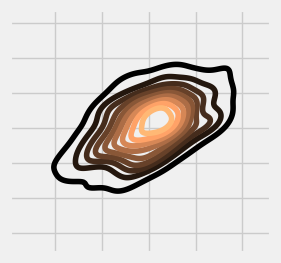

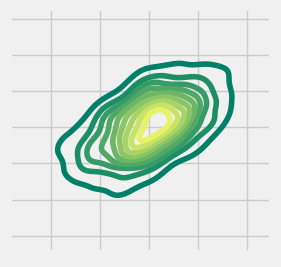

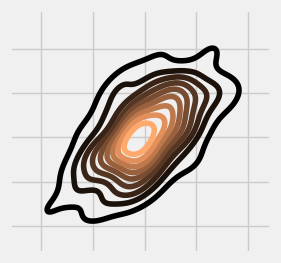

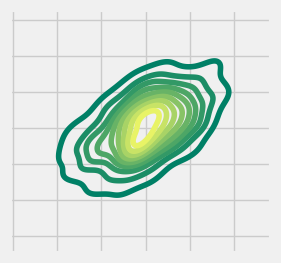

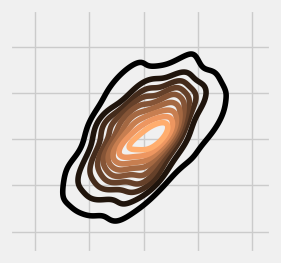

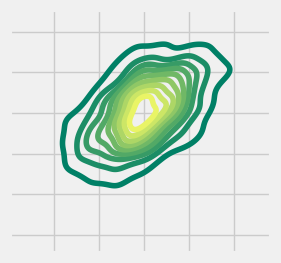

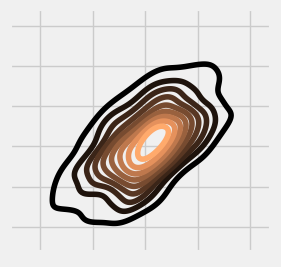

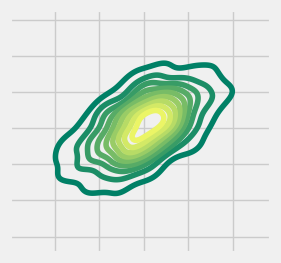

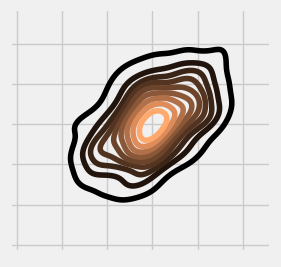

In [61]:
import seaborn as sns
from sklearn.model_selection import train_test_split

rng = np.random.RandomState(12345)

gauss = rng.multivariate_normal(mean=np.array([0., 0.]), 
                                cov=np.array([[2., 1.], 
                                              [1., 2.]]), 
                                size=1000)

with plt.style.context(('fivethirtyeight')):
    fig = plt.figure(figsize=(3, 3))
    ax = fig.add_subplot(111)
    sns.kdeplot(x=gauss[:, 0], y=gauss[:, 1])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.savefig('figures/gauss_large_orig.svg')
    #plt.show()
    

seeds = np.arange(10**5)
rng.shuffle(seeds)
seeds = seeds[:50]

pred_2 = []

with plt.style.context(('fivethirtyeight')):
    for i in range(5):
        X_train, X_test = train_test_split(gauss,
                                           test_size=0.3, 
                                           random_state=i)
    
        fig = plt.figure(figsize=(3, 3))
        ax = fig.add_subplot(111)
        sns.kdeplot(x=X_train[:, 0], y=X_train[:, 1], cmap='summer')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        plt.savefig('figures/gauss_%d_large_train.svg' % i)
        #plt.show()
        fig = plt.figure(figsize=(3, 3))
        ax = fig.add_subplot(111)
        sns.kdeplot(x=X_test[:, 0], y=X_test[:, 1], cmap='copper')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        plt.savefig('figures/gauss_%d_large_test.svg' % i)
        #plt.show()

# Holdout method and repeated sampling (Monte Carlo Cross-Validation)

In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X, y = iris.data[:, :], iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3, 
                                                    random_state=1,
                                                    stratify=y)

clf_1 = KNeighborsClassifier(n_neighbors=3,
                             weights='uniform', 
                             algorithm='kd_tree', 
                             leaf_size=30, 
                             p=2, 
                             metric='minkowski', 
                             metric_params=None, 
                             n_jobs=1)

0.9544


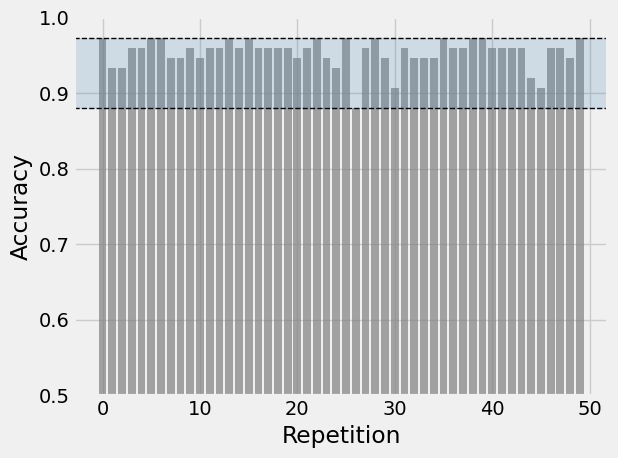

In [10]:
rng = np.random.RandomState(seed=12345)
seeds = np.arange(10**5)
rng.shuffle(seeds)
seeds = seeds[:50]

pred_2 = []

for i in seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.5, 
                                                        random_state=i,
                                                        stratify=y)
    y_pred_i = clf_1.fit(X_train, y_train).predict(X_test)
    y_pred_i_acc = np.mean(y_test == y_pred_i)
    pred_2.append(y_pred_i_acc)

pred_2 = np.asarray(pred_2)
print(pred_2.mean())

with plt.style.context(('fivethirtyeight')):
    plt.bar(range(0, pred_2.shape[0]), pred_2, color='gray', alpha=0.7)
    plt.axhline(pred_2.max(), color='k', linewidth=1, linestyle='--')
    plt.axhline(pred_2.min(), color='k', linewidth=1, linestyle='--')
    plt.axhspan(pred_2.min(), pred_2.max(), alpha=0.2, color='steelblue')
    plt.ylim([0, pred_2.max() + 0.1])
    plt.xlabel('Repetition')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1.0])
    plt.tight_layout()
    plt.savefig('figures/model-eval-iris_0.svg')

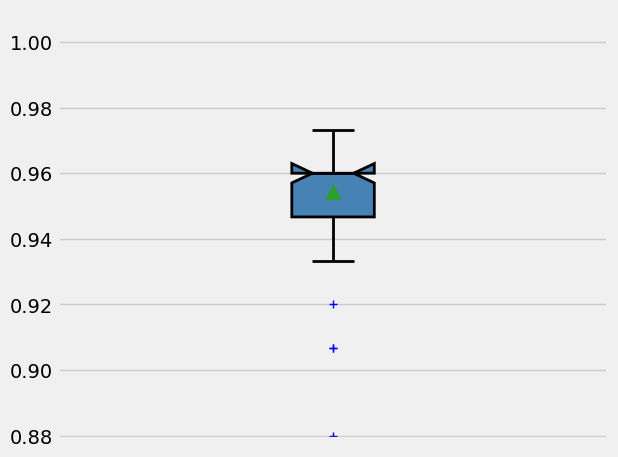

In [11]:
with plt.style.context(('fivethirtyeight')):
    bp = plt.boxplot(pred_2,
                notch=True,
                sym='bs',
                showmeans=True,
                patch_artist=True,     
                vert=True)
    plt.setp(bp['boxes'], color='black')
    plt.setp(bp['whiskers'], color='black', linestyle='-', linewidth=2)
    plt.setp(bp['fliers'], color='black', marker='+')
    plt.setp(bp['medians'], color='black', linewidth=2)
    plt.setp(bp['means'], c='gray', markersize=10)
    plt.setp(bp['caps'], linewidth=2)
    plt.setp(bp['boxes'], facecolor='steelblue', linewidth=2)
    plt.ylim([pred_2.min()-0.001, 1.01])
    plt.xticks([])
    plt.tight_layout()
    plt.savefig('figures/model-eval-iris_1.svg')

0.9613333333333334


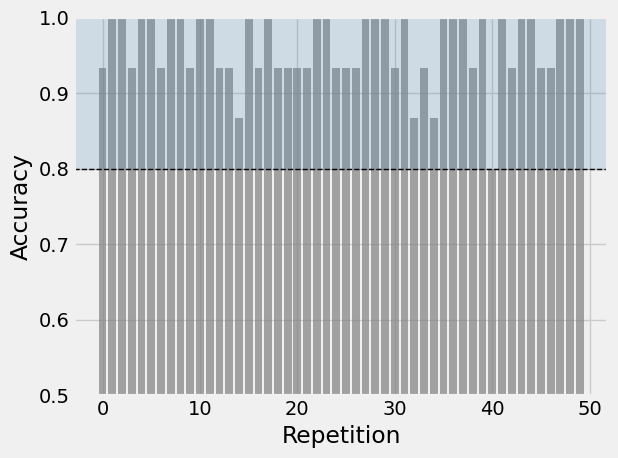

In [12]:
rng = np.random.RandomState(seed=12345)
seeds = np.arange(10**5)
rng.shuffle(seeds)
seeds = seeds[:50]

pred_2 = []

for i in seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.1, 
                                                        random_state=i,
                                                        stratify=y)
    y_pred_i = clf_1.fit(X_train, y_train).predict(X_test)
    y_pred_i_acc = np.mean(y_test == y_pred_i)
    pred_2.append(y_pred_i_acc)
    
pred_2 = np.asarray(pred_2)
print(pred_2.mean())

with plt.style.context(('fivethirtyeight')):
    plt.bar(range(0, pred_2.shape[0]), pred_2, color='gray', alpha=0.7)
    plt.axhline(pred_2.max(), color='k', linewidth=1, linestyle='--')
    plt.axhline(pred_2.min(), color='k', linewidth=1, linestyle='--')
    plt.axhspan(pred_2.min(), pred_2.max(), alpha=0.2, color='steelblue')
    plt.ylim([0, pred_2.max() + 0.1])
    plt.xlabel('Repetition')
    plt.ylabel('Accuracy')
    plt.ylim(0.5, 1.0)
    plt.tight_layout()
    plt.savefig('figures/model-eval-iris_0_2.svg')

## Pessimistic Bias in Holdout

In [18]:
from mlxtend.data import mnist_data

X2, y2 = mnist_data()
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2,
                                                    test_size=0.3, 
                                                    random_state=12,
                                                    stratify=y2)
y_train2

array([8, 8, 7, ..., 6, 9, 8])

In [19]:
from sklearn.linear_model import LogisticRegression

clf_2 = LogisticRegression(penalty='l2', 
                           dual=False, 
                           tol=0.0001, 
                           C=0.000001, 
                           fit_intercept=True, 
                           intercept_scaling=1, 
                           class_weight=None, 
                           random_state=12, 
                           solver='lbfgs', 
                           max_iter=100, 
                           multi_class='multinomial', 
                           verbose=0, 
                           warm_start=False, 
                           n_jobs=1)

pred_train, pred_test = [], []

intervals = np.arange(500, X_train2.shape[0] + 1, 200)

for i in intervals:
    clf_2.fit(X_train2[:i], y_train2[:i])
    p_train = clf_2.score(X_train2[:i], y_train2[:i])
    p_test = clf_2.score(X_test2, y_test2)
    pred_train.append(p_train)
    pred_test.append(p_test)

c:\Users\USER\miniconda3\envs\data_science\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\USER\miniconda3\envs\data_science\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

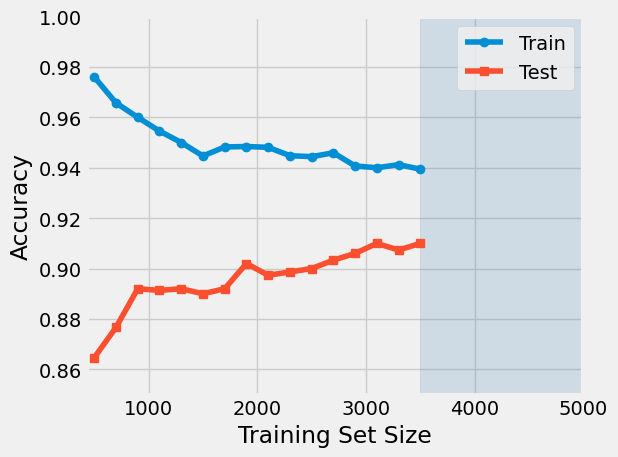

In [20]:
with plt.style.context(('fivethirtyeight')):
    plt.plot(intervals, pred_train, marker='o', label='Train')
    plt.plot(intervals, pred_test, marker='s', label='Test')
    plt.legend(loc='best', numpoints=1)
    plt.xlim([430, X_train2.shape[0] + X_test2.shape[0]])
    plt.axvspan(X_train2.shape[0], 
                X_train2.shape[0] + X_test2.shape[0], 
                alpha=0.2, 
                color='steelblue')
    plt.ylim([0.85, 1.0])
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.tight_layout()
    plt.savefig('figures/model-eval-mnist_0.svg')

##  Bootstrap

In [21]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

rng = np.random.RandomState(seed=12345)

iris = load_iris()
X, y = iris.data, iris.target

clf = KNeighborsClassifier(n_neighbors=3,
                             weights='uniform', 
                             algorithm='kd_tree', 
                             leaf_size=30, 
                             p=2, 
                             metric='minkowski', 
                             metric_params=None, 
                             n_jobs=1)


idx = np.arange(y.shape[0])

accuracies = []

for i in range(200):
    
    train_idx = rng.choice(idx, size=idx.shape[0], replace=True)
    test_idx = np.setdiff1d(idx, train_idx, assume_unique=False)
    
    boot_train_X, boot_train_y = X[train_idx], y[train_idx]
    boot_test_X, boot_test_y = X[test_idx], y[test_idx]
    
    clf.fit(boot_train_X, boot_train_y)
    acc = clf.score(boot_test_X, boot_test_y)
    accuracies.append(acc)

In [23]:
from mlxtend.data import mnist_data
from sklearn.linear_model import LogisticRegression

rng = np.random.RandomState(seed=12345)

X, y = mnist_data()

clf = LogisticRegression(penalty='l2', 
                           dual=False, 
                           tol=0.0001, 
                           C=0.000001, 
                           fit_intercept=True, 
                           intercept_scaling=1, 
                           class_weight=None, 
                           random_state=12, 
                           solver='lbfgs', 
                           max_iter=100, 
                           multi_class='multinomial', 
                           verbose=0, 
                           warm_start=False, 
                           n_jobs=1)


idx = np.arange(y.shape[0])

accuracies = []

for i in range(200):
    
    train_idx = rng.choice(idx, size=idx.shape[0], replace=True)
    test_idx = np.setdiff1d(idx, train_idx, assume_unique=False)
    
    boot_train_X, boot_train_y = X[train_idx], y[train_idx]
    boot_test_X, boot_test_y = X[test_idx], y[test_idx]
    
    clf.fit(boot_train_X, boot_train_y)
    acc = clf.score(boot_test_X, boot_test_y)
    accuracies.append(acc)

c:\Users\USER\miniconda3\envs\data_science\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\USER\miniconda3\envs\data_science\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

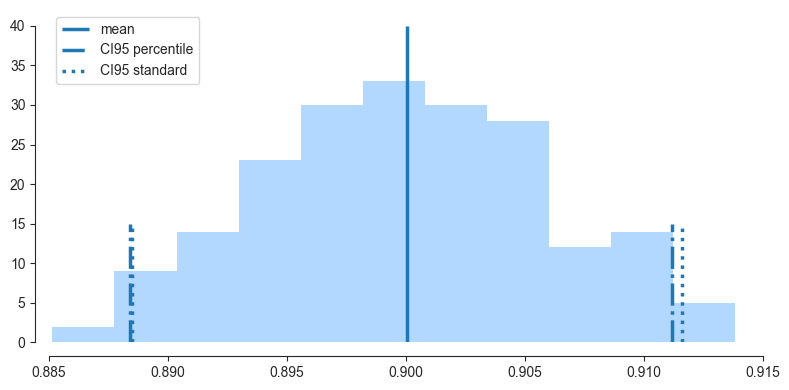

In [24]:
import seaborn as sns

sns.set_style("ticks")

mean = np.mean(accuracies)

#se = np.sqrt( (1. / (100-1)) * np.sum([(acc - mean)**2 for acc in accuracies])) 
#ci = 1.984 * se

se = np.sqrt( (1. / (200-1)) * np.sum([(acc - mean)**2 for acc in accuracies])) 
ci = 1.984 * se

lower = np.percentile(accuracies, 2.5)
upper = np.percentile(accuracies, 97.5)

fig, ax = plt.subplots(figsize=(8, 4))
ax.vlines(mean, [0], 40, lw=2.5, linestyle='-', label='mean')
#ax.vlines(med, [0], 60, lw=2.5, linestyle='--', label='median')
ax.vlines(lower, [0], 15, lw=2.5, linestyle='-.', label='CI95 percentile')
ax.vlines(upper, [0], 15, lw=2.5, linestyle='-.')

ax.vlines(mean + ci, [0], 15, lw=2.5, linestyle=':', label='CI95 standard')
ax.vlines(mean - ci, [0], 15, lw=2.5, linestyle=':')


ax.hist(accuracies, bins=11,
        color='#0080ff', edgecolor="none", 
        alpha=0.3)
plt.legend(loc='upper left')

plt.xlim([0.885, 0.915])
sns.despine(offset=10, trim=True)
plt.tight_layout()

plt.savefig('figures/bootstrap-histo-2.svg')

plt.show()

# Ley de parsimonia

## K-fold and standard deviation (1-standard error method)

In [27]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


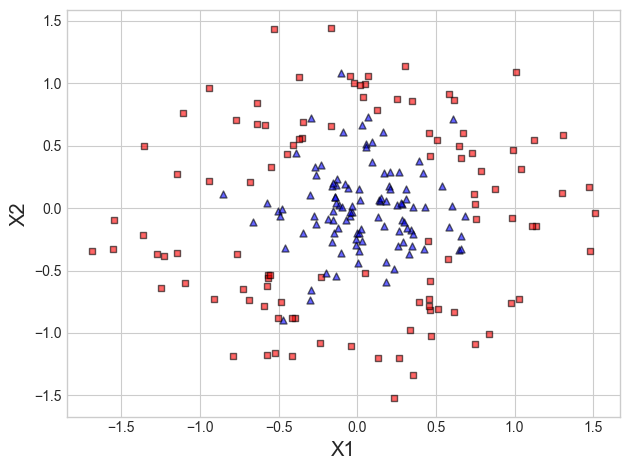

In [28]:
from sklearn.datasets import make_circles


with plt.style.context(('seaborn-v0_8-whitegrid')):
    X, y = make_circles(n_samples=300, random_state=1, noise=0.275, factor=0.2)

    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.3, 
                                                        random_state=12345,
                                                        stratify=y)

    plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], 
                marker='s', color='red', edgecolor='k', alpha=0.6, s=25)
    plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], 
                marker='^', color='blue', edgecolor='k', alpha=0.6, s=25)
    plt.xlabel('X1', fontsize=14.5)
    plt.ylabel('X2', fontsize=14.5)
    plt.tight_layout()
    plt.savefig('figures/model-eval-circles_1.svg')
    plt.show()

<>:52: SyntaxWarning: invalid escape sequence '\g'
<>:52: SyntaxWarning: invalid escape sequence '\g'
C:\Users\USER\AppData\Local\Temp\ipykernel_38416\1467014273.py:52: SyntaxWarning: invalid escape sequence '\g'
  plt.xlabel('$\gamma$', fontsize=25)


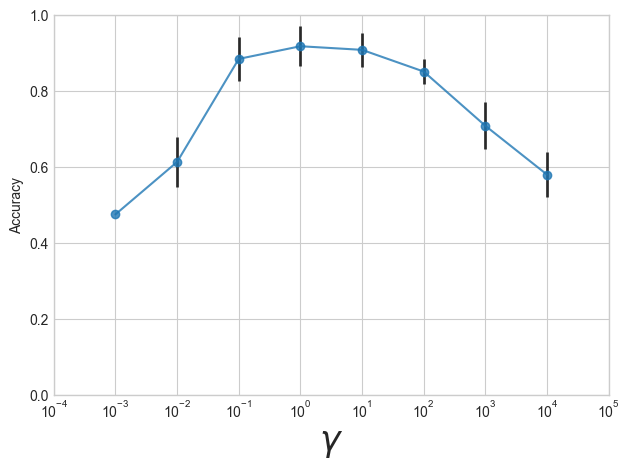

In [32]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold

params = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
cv_acc, cv_std, cv_stderr = [], [], []


cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

for c in params:

    clf = SVC(C=10.0, 
              kernel='rbf', 
              degree=1, 
              gamma=c, 
              coef0=0.0, 
              shrinking=True, 
              probability=False, 
              tol=0.001, 
              cache_size=200, 
              class_weight=None, 
              verbose=False, 
              max_iter=-1, 
              random_state=0)

    
    all_acc = []
    for train_index, valid_index in cv.split(X_train, y_train):
        pred = clf.fit(X_train[train_index], y_train[train_index])\
               .predict(X_train[valid_index])
        acc = np.mean(y_train[valid_index] == pred)
        all_acc.append(acc)

    all_acc = np.array(all_acc)
    y_pred_cv10_mean = all_acc.mean()
    y_pred_cv10_std = all_acc.std()
    y_pred_cv10_stderr = y_pred_cv10_std / np.sqrt(10)

    cv_acc.append(y_pred_cv10_mean) 
    cv_std.append(y_pred_cv10_std)
    cv_stderr.append(y_pred_cv10_stderr)
    

with plt.style.context(('seaborn-v0_8-whitegrid')):
    
    ax = plt.subplot(111)
    ax.set_xscale('log')
    ax.errorbar(params, cv_acc, yerr=cv_std, marker='o', alpha=0.8, ecolor='black', elinewidth=2)

    plt.ylim([0.0, 1.0])
    plt.xlim([0.0001, 100000.0])
    plt.xlabel('$\gamma$', fontsize=25)
    plt.ylabel('Accuracy')
    plt.tight_layout()
    plt.savefig('figures/model-eval-circles_2.svg')
    plt.show()

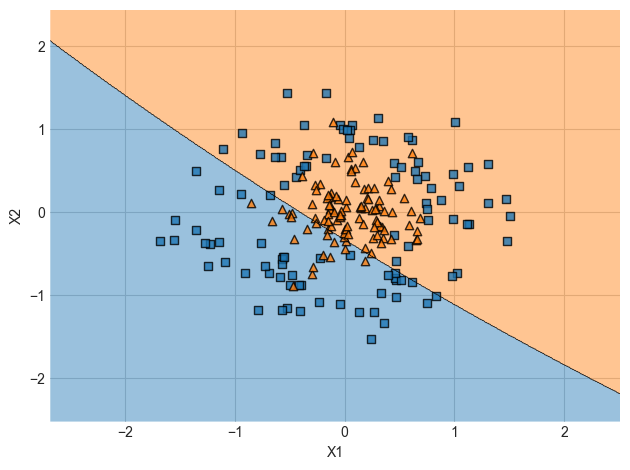

In [36]:
from mlxtend.plotting import plot_decision_regions

clf = SVC(C=10.0, 
          kernel='rbf', 
          degree=1, 
          gamma=0.001, 
          coef0=0.0, 
          shrinking=True, 
          probability=False, 
          tol=0.001, 
          cache_size=200, 
          class_weight=None, 
          verbose=False, 
          max_iter=-1, 
          random_state=123)

clf.fit(X_train, y_train)

with plt.style.context(('seaborn-v0_8-whitegrid')):
    plot_decision_regions(X_train, 
                          y_train, 
                          clf=clf, 
                          legend=None)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.tight_layout()
    plt.savefig('figures/model-eval-circles_3.svg')
    plt.show()

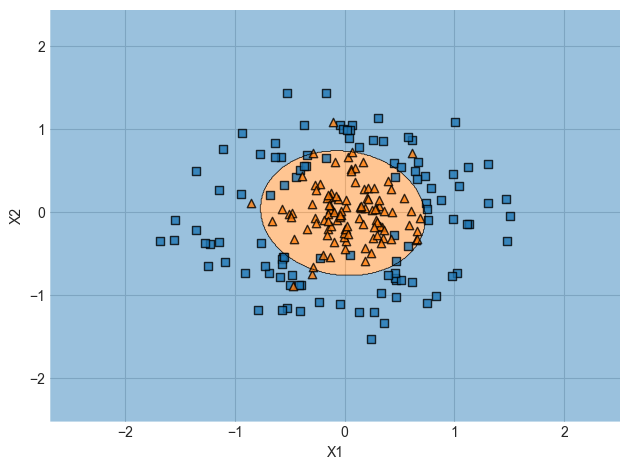

In [39]:
clf = SVC(C=10.0, 
          kernel='rbf', 
          degree=1, 
          gamma=0.1, 
          coef0=0.0, 
          shrinking=True, 
          probability=False, 
          tol=0.001, 
          cache_size=200, 
          class_weight=None, 
          verbose=False, 
          max_iter=-1, 
          random_state=123)

clf.fit(X_train, y_train)
with plt.style.context(('seaborn-v0_8-whitegrid')):
    plot_decision_regions(X_train, 
                          y_train, 
                          clf=clf, 
                          legend=None)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.tight_layout()
    plt.savefig('figures/model-eval-circles_4.svg')
    plt.show()

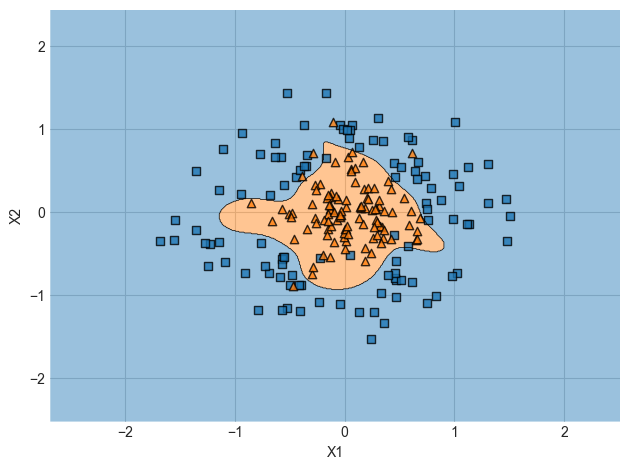

In [41]:
clf = SVC(C=10.0, 
          kernel='rbf', 
          degree=1, 
          gamma=10, 
          coef0=0.0, 
          shrinking=True, 
          probability=False, 
          tol=0.001, 
          cache_size=200, 
          class_weight=None, 
          verbose=False, 
          max_iter=-1, 
          random_state=123)

clf.fit(X_train, y_train)
with plt.style.context(('seaborn-v0_8-whitegrid')):
    plot_decision_regions(X_train, 
                          y_train, 
                          clf=clf, 
                          legend=None)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.tight_layout()
    plt.savefig('figures/model-eval-circles_5.svg')
    plt.show()

## Repeated k-fold

In [43]:
rng = np.random.RandomState(seed=12345)
seeds = np.arange(10**5)
rng.shuffle(seeds)
seeds = seeds[:5]

params = [0.01, 0.1, 1.0, 10.0, 100.0]
cv_acc, cv_std, cv_stderr = [], [], []

params_by_seed = []
for seed in seeds:
    cv = StratifiedKFold(n_splits=10, 
                         shuffle=True, random_state=seed)
    acc_by_param = []
    for c in params:
        
        clf = SVC(C=1.0, 
                  kernel='rbf', 
                  degree=1, 
                  gamma=c, 
                  coef0=0.0, 
                  shrinking=True, 
                  probability=False, 
                  tol=0.001, 
                  cache_size=200, 
                  class_weight=None, 
                  verbose=False, 
                  max_iter=-1, 
                  random_state=12345)


        all_acc = []
        for train_index, valid_index in cv.split(X_train, y_train):
            pred = clf.fit(X_train[train_index], y_train[train_index])\
                   .predict(X_train[valid_index])
            acc = np.mean(y_train[valid_index] == pred)
            all_acc.append(acc)

        all_acc = np.array(all_acc)
        acc_by_param.append(all_acc.mean())
    print(acc_by_param)
    params_by_seed.append(acc_by_param)

[0.47619047619047616, 0.7714285714285714, 0.8952380952380953, 0.9333333333333333, 0.8666666666666666]
[0.47619047619047616, 0.7666666666666666, 0.8857142857142856, 0.9285714285714286, 0.8571428571428571]
[0.47619047619047616, 0.7666666666666666, 0.8809523809523808, 0.9142857142857143, 0.8619047619047618]
[0.47619047619047616, 0.7761904761904761, 0.8857142857142858, 0.9142857142857143, 0.8428571428571427]
[0.47619047619047616, 0.780952380952381, 0.9142857142857143, 0.9238095238095239, 0.8428571428571429]


<>:9: SyntaxWarning: invalid escape sequence '\g'
<>:9: SyntaxWarning: invalid escape sequence '\g'
C:\Users\USER\AppData\Local\Temp\ipykernel_38416\894492546.py:9: SyntaxWarning: invalid escape sequence '\g'
  plt.xlabel('$\gamma$', fontsize=25)


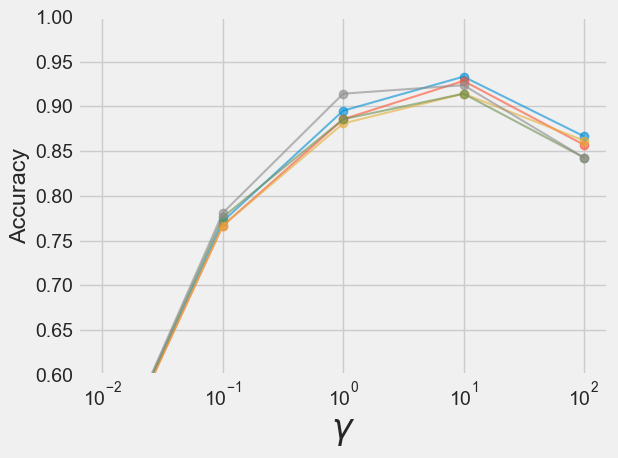

In [44]:
with plt.style.context(('fivethirtyeight')):
    ax = plt.subplot(111)
    ax.set_xscale('log')
    
    for cv_acc in params_by_seed:
        ax.errorbar(params, cv_acc, linewidth=1.5, alpha=0.6, marker='o')

    plt.ylim([0.6, 1.0])
    plt.xlabel('$\gamma$', fontsize=25)
    plt.ylabel('Accuracy')
    plt.tight_layout()
    plt.savefig('figures/model-eval-circles_7.svg')
    plt.show()

In [45]:
y_train.shape

(210,)

<>:51: SyntaxWarning: invalid escape sequence '\g'
<>:51: SyntaxWarning: invalid escape sequence '\g'
C:\Users\USER\AppData\Local\Temp\ipykernel_38416\2608995198.py:51: SyntaxWarning: invalid escape sequence '\g'
  plt.xlabel('$\gamma$', fontsize=25)


[0.6523809523809524, 0.7619047619047619, 0.9, 0.919047619047619, 0.8571428571428571]
[0.619047619047619, 0.7523809523809524, 0.9, 0.9190476190476191, 0.8619047619047618]
[0.6238095238095237, 0.7380952380952381, 0.8904761904761905, 0.919047619047619, 0.8571428571428571]
[0.6238095238095237, 0.7714285714285715, 0.8809523809523808, 0.9, 0.8142857142857143]
[0.6047619047619047, 0.7428571428571429, 0.8904761904761905, 0.9238095238095239, 0.8571428571428571]


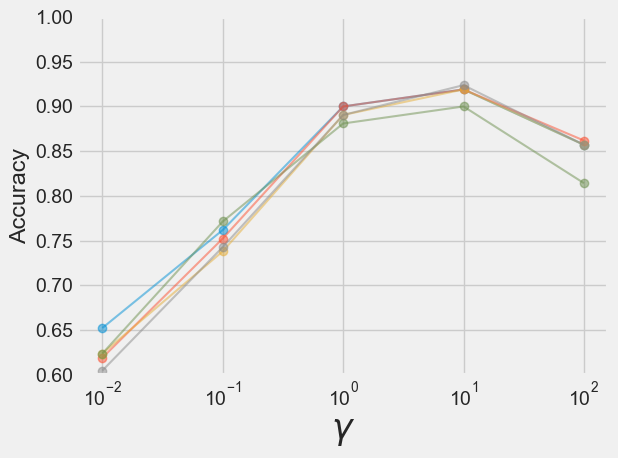

In [47]:
rng = np.random.RandomState(seed=12345)
seeds = np.arange(10**5)
rng.shuffle(seeds)
seeds = seeds[:5]

params = [0.01, 0.1, 1.0, 10.0, 100.0]
cv_acc, cv_std, cv_stderr = [], [], []

params_by_seed = []
for seed in seeds:
    cv = StratifiedKFold(n_splits=5, 
                         shuffle=True, random_state=seed)
    acc_by_param = []
    for c in params:
        
        clf = SVC(C=1.0, 
                  kernel='rbf', 
                  degree=1, 
                  gamma=c, 
                  coef0=0.0, 
                  shrinking=True, 
                  probability=False, 
                  tol=0.001, 
                  cache_size=200, 
                  class_weight=None, 
                  verbose=False, 
                  max_iter=-1, 
                  random_state=12345)


        all_acc = []
        for train_index, valid_index in cv.split(X_train, y_train):
            pred = clf.fit(X_train[train_index], y_train[train_index])\
                   .predict(X_train[valid_index])
            acc = np.mean(y_train[valid_index] == pred)
            all_acc.append(acc)

        all_acc = np.array(all_acc)
        acc_by_param.append(all_acc.mean())
    print(acc_by_param)
    params_by_seed.append(acc_by_param)
    
with plt.style.context(('fivethirtyeight')):
    ax = plt.subplot(111)
    ax.set_xscale('log')
    
    for cv_acc in params_by_seed:
        ax.errorbar(params, cv_acc, linewidth=1.5, alpha=0.5, marker='o')

    plt.ylim([0.6, 1.0])
    plt.xlabel('$\gamma$', fontsize=25)
    plt.ylabel('Accuracy')
    plt.tight_layout()
    plt.savefig('figures/model-eval-circles_7_2.svg')
    plt.show()

<>:51: SyntaxWarning: invalid escape sequence '\g'
<>:51: SyntaxWarning: invalid escape sequence '\g'
C:\Users\USER\AppData\Local\Temp\ipykernel_38416\1130700703.py:51: SyntaxWarning: invalid escape sequence '\g'
  plt.xlabel('$\gamma$', fontsize=25)


[0.4285714285714286, 0.7761904761904764, 0.8904761904761906, 0.9285714285714286, 0.8714285714285716]
[0.4285714285714286, 0.7761904761904763, 0.9000000000000001, 0.9333333333333335, 0.8619047619047621]
[0.4285714285714286, 0.7761904761904763, 0.8857142857142858, 0.9333333333333333, 0.8523809523809525]
[0.4285714285714286, 0.7666666666666667, 0.8904761904761906, 0.9190476190476191, 0.8476190476190477]
[0.4285714285714286, 0.7714285714285715, 0.8904761904761906, 0.9285714285714286, 0.8476190476190477]


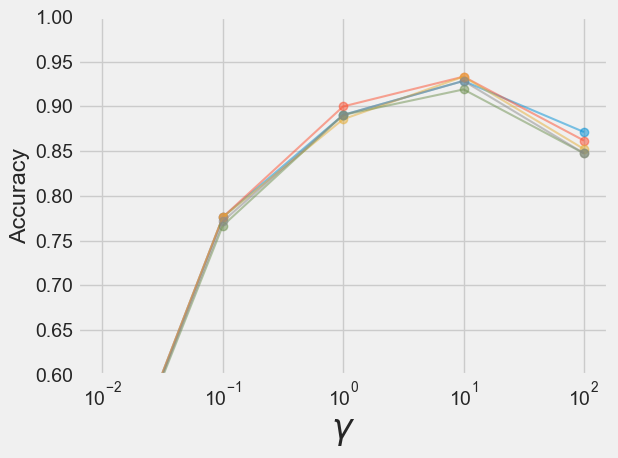

In [49]:
rng = np.random.RandomState(seed=12345)
seeds = np.arange(10**5)
rng.shuffle(seeds)
seeds = seeds[:5]

params = [0.01, 0.1, 1.0, 10.0, 100.0]
cv_acc, cv_std, cv_stderr = [], [], []

params_by_seed = []
for seed in seeds:
    cv = StratifiedKFold(n_splits=30, 
                         shuffle=True, random_state=seed)
    acc_by_param = []
    for c in params:
        
        clf = SVC(C=1.0, 
                  kernel='rbf', 
                  degree=1, 
                  gamma=c, 
                  coef0=0.0, 
                  shrinking=True, 
                  probability=False, 
                  tol=0.001, 
                  cache_size=200, 
                  class_weight=None, 
                  verbose=False, 
                  max_iter=-1, 
                  random_state=12345)


        all_acc = []
        for train_index, valid_index in cv.split(X_train, y_train):
            pred = clf.fit(X_train[train_index], y_train[train_index])\
                   .predict(X_train[valid_index])
            acc = np.mean(y_train[valid_index] == pred)
            all_acc.append(acc)

        all_acc = np.array(all_acc)
        acc_by_param.append(all_acc.mean())
    print(acc_by_param)
    params_by_seed.append(acc_by_param)
    
with plt.style.context(('fivethirtyeight')):
    ax = plt.subplot(111)
    ax.set_xscale('log')
    
    for cv_acc in params_by_seed:
        ax.errorbar(params, cv_acc, linewidth=1.5, alpha=0.5, marker='o')

    plt.ylim([0.6, 1.0])
    plt.xlabel('$\gamma$', fontsize=25)
    plt.ylabel('Accuracy')
    plt.tight_layout()
    plt.savefig('figures/model-eval-circles_7_3.svg')
    plt.show()